In [3]:

from collections import Counter
import warnings
import numpy as np
import pandas as pd
from os import path
from PIL import Image
import re
import os
import contractions
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [4]:
parriable = 'AVIATION'


folder_path = f'data/Resume/{parriable}'
resume_folder = os.path.basename(folder_path).lower()


with open(f'{folder_path}/{resume_folder}_resumes.txt', 'r') as resume_script:
    # open txt file and read to string
    resume_file = resume_script.read().lower()


In [ ]:
with open('data/bri/bri_resumes.txt', 'r') as resume_script:
    # open txt file and read to string
    resume_file = resume_script.read().lower()


In [ ]:
# regex to keep only punctuation or words more than two letters long, may or may not contain an apostrophe in the middle
resume_string = re.findall(r"[a-z]+[']?[a-z]+", resume_file)
# adds things to out list of unwanted words
more_drops = ['state', 'city', 'name', 'company', 'of', 'for', 'as',
              'college', 'am', 'the', 'to', 'on', 'in', 'with', 'and']
# toss those words to the curbs
stop_dropped_resume = [w for w in resume_string if not w in more_drops]
# Here, we will expand contractions
expanded_words = []
for word in stop_dropped_resume:
  # using contractions.fix to expand the shortened words
  expanded_words.append(contractions.fix(word))

word_cloud_dict = Counter(expanded_words)
print(word_cloud_dict)


In [14]:
resume_dict = {}
# for loop that runs over every word in our string, but stating to stop at the last word
for i, word in enumerate(expanded_words[:-1]):
    # setting this word to be the word right after the one we were on
    this_word = expanded_words[i+1]
    # if this_word isn't in our dictionary already...
    if this_word not in resume_dict:
        # start our counter dict
        next_count = {}
        # add our new word to be a key in our resume dict and the count dict to be its value
        resume_dict[this_word] = next_count
    # if it is already in there....
    else:
        # create empty dictionary with this_word as the key and next_count as the value
        next_count = resume_dict[this_word]
    # if the next word(word) is in our nested dict already...
    if word in next_count:
        # add one to its count
        next_count[word] += 1
    # if its not already in there
    else:
        # lets add it and set its count to 1
        next_count[word] = 1


In [15]:
import json

with open("json_graph.json", "w") as jason:
    json.dump(resume_dict, jason, indent = 3)
# json.dumps(resume_dict, sort_keys=True, indent=3))


In [13]:
from itertools import chain
from operator import itemgetter
import networkx as nx
from networkx.readwrite import json_graph
# vg = lambda d: d.values()
# cg = itemgetter('class')
# list(map(cg, chain(*map(vg, c))))
# import pandas as pd
# df = pd.DataFrame(resume_dict)
# # df.transpose().plot.bar()
# dod = {0: {1: {"weight": 1}}}
# G = nx.from_dict_of_dicts(dod)


G = nx.Graph(resume_dict)
print(G)
data = json_graph.tree_data(G, root=1)
H = json_graph.tree_graph(data)
# nx.write_gpickle(G, 'finished_resumes/graph.gpickle')
# G = nx.read_gpickle('finished_resumes/graph.gpickle')


Graph with 8261 nodes and 48707 edges


TypeError: G is not a tree.

[]

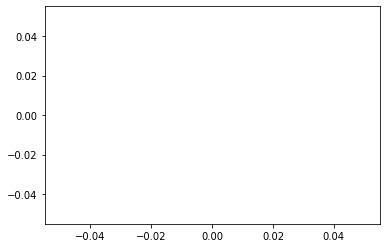

In [9]:

import matplotlib.pylab as plt

lists = sorted(resume_dict.items())  # sorted by key, return a list of tuples

x, y = zip(*lists)  # unpack a list of pairs into two tuples

plt.plot()
# plt.show()


In [33]:


wordcloud = WordCloud(
    width=1000, height=500).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis("off")
#plt.show()
plt.savefig(f'{folder_path}/{resume_folder}_wordcloud.png', bbox_inches='tight')
plt.close()
